# Центральная предельная теорема, Coursera, курс "Математика и Python"

## 1) Распределение $\chi^2$ (хи-квадрат)

Пусть у нас есть $N$ независимых нормально распределенных случайных величин $z_1, z_2, \dots, z_N$ с нулевым математическим ожиданием и единичным среднеквадратическим отклонением, то есть $z_i \sim N(0, 1), \forall i \in \overline{1, N}$. Тогда распределением $\chi^2$ с $N$ степенями свободы будем называть случайную величину $x$, заданную формулой: $x = \sum \limits _{i=1} ^N z_i^2$ и обозначаемой $x \sim \chi^2(N)$. Данное распределение часто встречается в статистике и статистических тестах (например распределению $\chi^2$ следует статистика теста Уайта), чем и был обусловлен выбор этого распределения. В данной работе мы будем рассматривать случай, когда $N = 3$, то есть $x \sim \chi^2(3)$. Ниже представлен график плотности этого распределения  

In [79]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

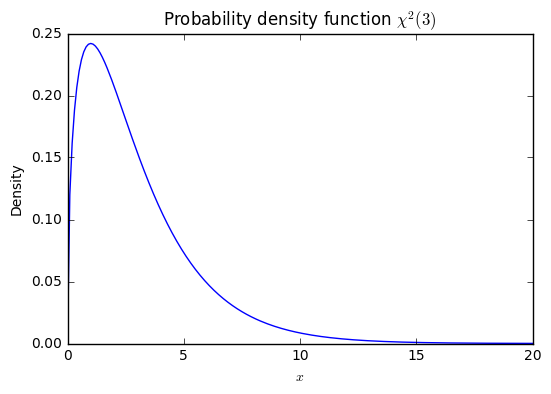

In [80]:
x_seq = np.linspace(0, 20, 201)
chi2 = sts.chi2(3)
d_seq = chi2.pdf(x_seq)
plt.plot(x_seq, d_seq)
plt.xlabel('$x$')
plt.ylabel('Density')
plt.title('Probability density function $\chi^2(3)$')
plt.show()

## 2) Визуализация выборки

Мы генерируем из распределения $\chi^2(3)$ случайную выборку из 1000 элементов и строим ее гистограмму, теоретическую плотность и эмпирическую плотность, построенную по методу ядерного сглаживания. Для наглядности случайная выборка является фиксированной (задаваемая параметром random_state), то есть при исполнении когда будут генерироваться всегда одни и те же элементы. 

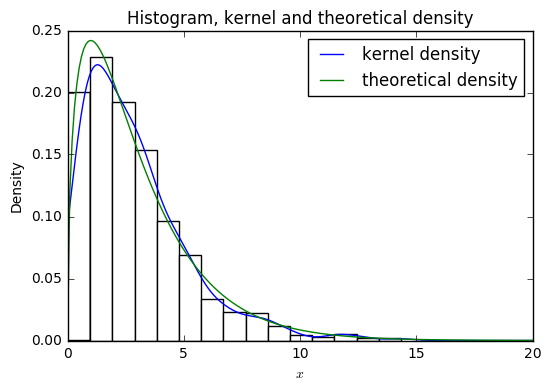

In [81]:
x_random = chi2.rvs(1000, random_state = 0)
x_df = pd.DataFrame(x_random, columns = ['kernel density'])
x_df.plot(kind = 'density')
plt.plot(x_seq, d_seq, label = 'theoretical density')
plt.hist(x_random, bins = 15, normed = True, color = 'white')
plt.xlabel('$x$')
plt.title('Histogram, kernel and theoretical density')
plt.xlim(0, 20)
plt.legend()
plt.show()

## 3) Создание выборок средних

Из созданной выборки, мы создадим 3 выборки из тысячи элементов каждая, каждый член которой является выборочным средним 4, 16 и 64 произвольных элементов исходной выборки, чтобы посмотреть точность аппроксимации с возрастанием числа элементов для подсчета выборочного среднего 

In [82]:
mean_4 = []
mean_16 = []
mean_64 = []
for i in range(1000):
    mean_4.append(np.mean(np.random.choice(x_random, 4)))
    mean_16.append(np.mean(np.random.choice(x_random, 16)))
    mean_64.append(np.mean(np.random.choice(x_random, 64)))
df_4 = pd.DataFrame(mean_4, columns = ['kernel 4'])
df_16 = pd.DataFrame(mean_16, columns = ['kernel 16'])
df_64 = pd.DataFrame(mean_64, columns = ['kernel 64'])

## 4) Центральная предельная теорема

Построенные выше выборочные средние $\overline{X} = \dfrac{1}{n} \sum \limits _{i=1} ^n x_i, n = \{4, 16, 64\}, x_i \sim \chi^2(3)$ сами в свою очередь являются случайными величинами. Центральная предельная теорема утверждает, что они сами являются нормально распределенными $\overline{X} \sim N\left(\mu_{\chi^2(3)}, \dfrac{\sigma_{\chi^2(3)}}{\sqrt{n}}\right)$ (в данном случае и ниже мы используем среднеквадратическое отклонение, а не дисперсию, как параметр нормального распределения), зная, что математическое ожидание и дисперсия распределения $\chi^2(k)$ равны $k$ и $2k$ соответственно, в нашем случае мы получаем, что $\overline{X} \sim N\left(3, \sqrt{\dfrac{6}{n}}\right), n = \{4, 16, 64\}$, то есть скреднеквадратическое отклонение будет равно $\{\sqrt{1.5}, \sqrt{0.375}, \sqrt{0.09375}\}$ соответственно. Ниже мы подготовим данные для визуализации этих нормальных распределений.

In [83]:
norm_4 = sts.norm(loc = 3, scale = np.sqrt(6/4.))
norm_16 = sts.norm(loc = 3, scale = np.sqrt(6/16.))
norm_64 = sts.norm(loc = 3, scale = np.sqrt(6/64.))
x_seq = np.linspace(0, 7, 100)
d_4_seq = norm_4.pdf(x_seq)
d_16_seq = norm_16.pdf(x_seq)
d_64_seq = norm_64.pdf(x_seq)

## 5) Визуализация выборок средних

Для каждой выборки мы составим график ее гистограммы, теоретической и эмпирической плотности.

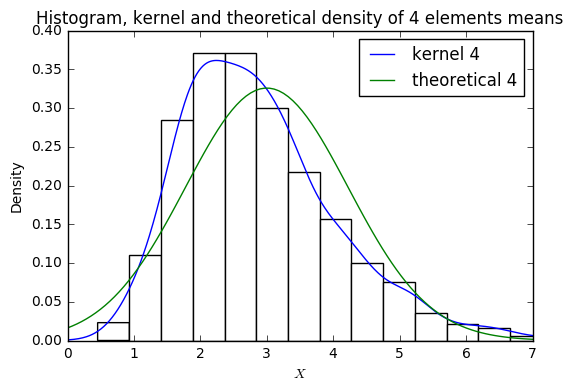

In [85]:
df_4.plot(kind = 'density')
plt.plot(x_seq, d_4_seq, label = 'theoretical 4')
plt.hist(mean_4, bins = 15, normed = True, color = 'white')
plt.xlabel('$X$')
plt.title('Histogram, kernel and theoretical density of 4 elements means')
plt.xlim(0, 7)
plt.legend()
plt.show()

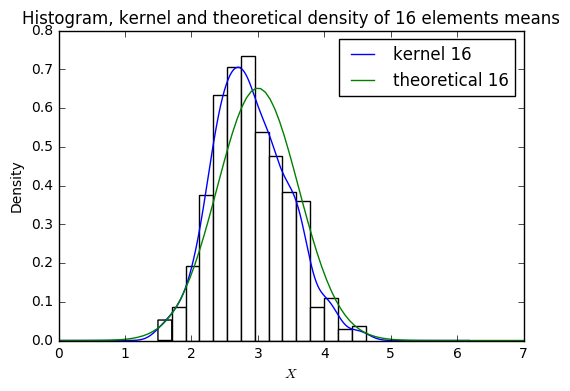

In [86]:
df_16.plot(kind = 'density')
plt.plot(x_seq, d_16_seq, label = 'theoretical 16')
plt.hist(mean_16, bins = 15, normed = True, color = 'white')
plt.xlabel('$X$')
plt.title('Histogram, kernel and theoretical density of 16 elements means')
plt.xlim(0, 7)
plt.legend()
plt.show()

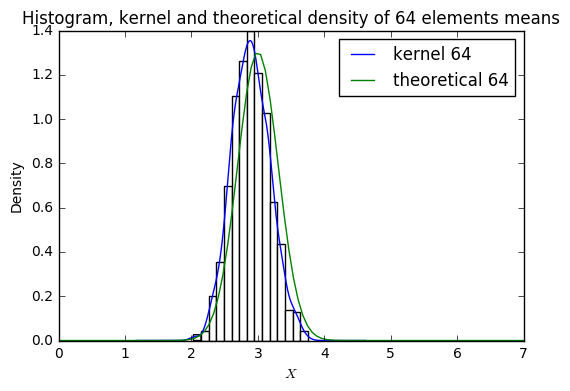

In [87]:
df_64.plot(kind = 'density')
plt.plot(x_seq, d_64_seq, label = 'theoretical 64')
plt.hist(mean_64, bins = 15, normed = True, color = 'white')
plt.xlabel('$X$')
plt.title('Histogram, kernel and theoretical density of 64 elements means')
plt.xlim(0, 7)
plt.legend()
plt.show()

## 6) Выводы

Построенные выше графики наглядно показывают суть центральной предельной теоремы. Из них видно, что чем больше $n$, тем выше точность аппроксимации распределения выборочных средних нормальным, если при $n=4$ график плотности ядерного сглаживания может весьма отличаться от теоретического нормального, то уже при $n=64$ точность достаточно хорошая. Также с ростом $n$ уменьшается среднеквадратичное отклонение выборочных средних. 